In [4]:
import pandas as pd

file_path = r"C:\Users\vande\becode\immo-eliza-ml\cleaned_properties.csv"

# Load CSV into a DataFrame
cleaned_properties = pd.read_csv(file_path)

# Preview the first 5 rows
print(cleaned_properties.head())



         id     price property_type subproperty_type            region  \
0  34221000  225000.0     APARTMENT        APARTMENT          Flanders   
1   2104000  449000.0         HOUSE            HOUSE          Flanders   
2  34036000  335000.0     APARTMENT        APARTMENT  Brussels-Capital   
3  58496000  501000.0         HOUSE            HOUSE          Flanders   
4  48727000  982700.0     APARTMENT           DUPLEX          Wallonia   

          province  locality  zip_code   latitude  longitude  ...  fl_garden  \
0          Antwerp   Antwerp      2050  51.217172   4.379982  ...          0   
1    East Flanders      Gent      9185  51.174944   3.845248  ...          0   
2         Brussels  Brussels      1070  50.842043   4.334543  ...          0   
3          Antwerp  Turnhout      2275  51.238312   4.817192  ...          0   
4  Walloon Brabant  Nivelles      1410        NaN        NaN  ...          1   

   garden_sqm  fl_swimming_pool  fl_floodzone  state_building  \
0        

In [6]:
# Count NaNs per column
nan_counts = cleaned_properties.isna().sum()

# Keep only columns with at least one NaN
nan_counts = nan_counts[nan_counts > 0]

# Sort in descending order
nan_counts_sorted = nan_counts.sort_values(ascending=False)

print("Columns with missing values (sorted):\n", nan_counts_sorted)



Columns with missing values (sorted):
 cadastral_income                  44964
surface_land_sqm                  36253
construction_year                 33388
primary_energy_consumption_sqm    26566
nbr_frontages                     26346
longitude                         14098
latitude                          14098
terrace_sqm                       13140
total_area_sqm                     7615
garden_sqm                         2939
province                              3
region                                3
locality                              3
dtype: int64


In [7]:
# 2️⃣ Basic distributions for numeric columns
print("\nBasic statistics:\n", cleaned_properties.describe())


Basic statistics:
                  id         price      zip_code      latitude     longitude  \
count  7.550800e+04  7.550800e+04  75508.000000  61410.000000  61410.000000   
mean   3.973205e+07  4.227730e+05   5144.670313     50.886621      4.328681   
std    2.290449e+07  4.383664e+05   3005.457468      0.349734      0.950905   
min    0.000000e+00  7.600000e+04   1000.000000     25.761680    -80.191790   
25%    1.989175e+07  2.420000e+05   2240.000000     50.705806      3.764070   
50%    3.972150e+07  3.290000e+05   4683.000000     50.900930      4.376711   
75%    5.954125e+07  4.550000e+05   8370.000000     51.148643      4.876499   
max    7.948500e+07  2.250000e+07   9992.000000     52.434244      6.385048   

       construction_year  total_area_sqm  surface_land_sqm  nbr_frontages  \
count       42120.000000    67893.000000      39255.000000   49162.000000   
mean         1984.406054      163.674282       1157.087505       2.802978   
std            41.528850      415.859

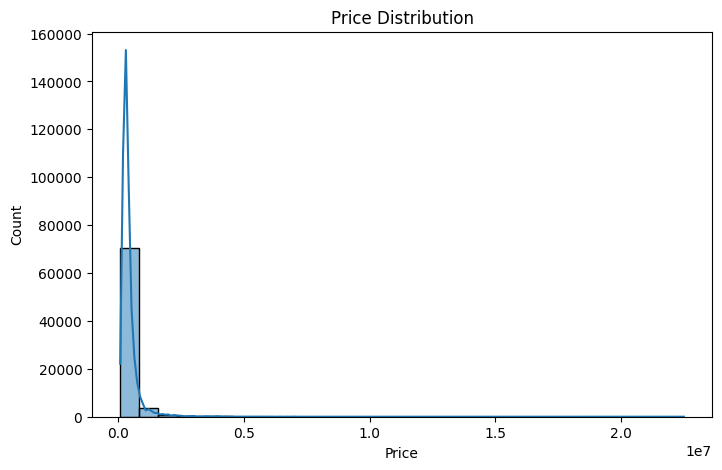

In [8]:
# 3️⃣ Target (price) distribution
plt.figure(figsize=(8, 5))
sns.histplot(cleaned_properties['price'], kde=True, bins=30)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

In [9]:
# 4️⃣ Skewness of price
price_skew = cleaned_properties['price'].skew()
print(f"\nSkewness of price: {price_skew:.2f}")


Skewness of price: 9.45


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import joblib


In [3]:
file_path = r"C:\Users\vande\becode\immo-eliza-ml\cleaned_properties.csv"
cleaned_properties = pd.read_csv(file_path)



In [4]:
X = cleaned_properties.drop(columns=["price"])
y = cleaned_properties["price"]


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [6]:
numeric_cols = X_train.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = X_train.select_dtypes(include=["object", "bool"]).columns

numeric_cols, categorical_cols


(Index(['id', 'zip_code', 'latitude', 'longitude', 'construction_year',
        'total_area_sqm', 'surface_land_sqm', 'nbr_frontages', 'nbr_bedrooms',
        'fl_furnished', 'fl_open_fire', 'fl_terrace', 'terrace_sqm',
        'fl_garden', 'garden_sqm', 'fl_swimming_pool', 'fl_floodzone',
        'primary_energy_consumption_sqm', 'fl_double_glazing',
        'cadastral_income'],
       dtype='object'),
 Index(['property_type', 'subproperty_type', 'region', 'province', 'locality',
        'equipped_kitchen', 'state_building', 'epc', 'heating_type'],
       dtype='object'))

In [7]:
numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])


In [8]:
categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])


In [9]:
preprocessor = ColumnTransformer([
    ("num", numeric_pipeline, numeric_cols),
    ("cat", categorical_pipeline, categorical_cols)
])


In [10]:
preprocessor.fit(X_train)


,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [11]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)


In [12]:
import joblib

joblib.dump(preprocessor, r"C:\Users\vande\becode\immo-eliza-ml\models\preprocessor_v1.joblib")


['C:\\Users\\vande\\becode\\immo-eliza-ml\\models\\preprocessor_v1.joblib']

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import joblib
import numpy as np


In [14]:
# Initialize model
lr_model = LinearRegression()

# Fit on preprocessed training data
lr_model.fit(X_train_processed, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
y_pred = lr_model.predict(X_test_processed)


In [20]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")



R²: 0.3787
MAE: 154718.80
RMSE: 352397.63


In [21]:
joblib.dump(lr_model, r"C:\Users\vande\becode\immo-eliza-ml\models\linear_reg_v1.joblib")


['C:\\Users\\vande\\becode\\immo-eliza-ml\\models\\linear_reg_v1.joblib']